 ## Analise Exploratoria dos Dados
 
 Nesse notebook, usaremos uma pesquisa real dos EUA sobre o mercado de trabalho dos programadores. Nosso objetivo é investigar os dados e identificar os problemas com os dados e fazer o tratamento dos mesmos.

 Pesquisa salarial realizada pelo site www.freecodecamp.com com os programadores que frequentaram o bootcamp.
 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import colorsys
plt.style.use('seaborn-talk')
%matplotlib inline

In [2]:
# carregando o dataset
df = pd.read_csv('Dados-Pesquisa.csv', sep = ',', low_memory = False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 13.5+ MB


In [31]:
# Lista todas as colunas do DF
list(df)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinorit

In [8]:
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,...,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2554.000000,42.0,...,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175714,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.896241,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017580,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.115975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50000.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10000.000000
50%,27.000000,0.000000,1.000000,1.000000,0.000000,6.000000,60000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20000.000000
75%,33.000000,0.000000,1.000000,1.000000,1.000000,12.000000,77000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40000.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,220.000000,200000.000000,1.000000,18.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1000000.000000


## Distribuição de Idade

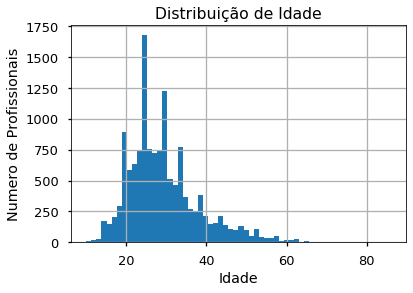

In [10]:
# A maioria dos programadores tem a idade entre 20 e 30 anos, sendo a maioria esta com 25 anos

# Gerando o histograma
df.Age.hist(bins = 60)
plt.xlabel('Idade')
plt.ylabel('Numero de Profissionais')
plt.title('Distribuição de Idade')
plt.show()

## Distribuição de Sexo

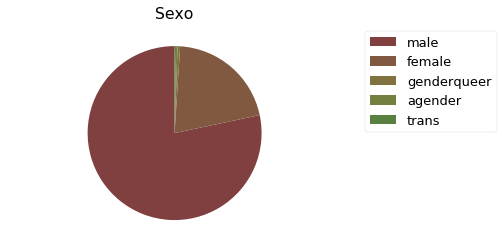

In [21]:
# A Grande maioria do sexo do programadores são do sexo Masculino

# Definindo a quantidade
labels = df.Gender.value_counts().index
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x * 1.0 / num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Grafico de Pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05, 1))
plt.title('Sexo')
plt.show()

## Distribuição de Interesses

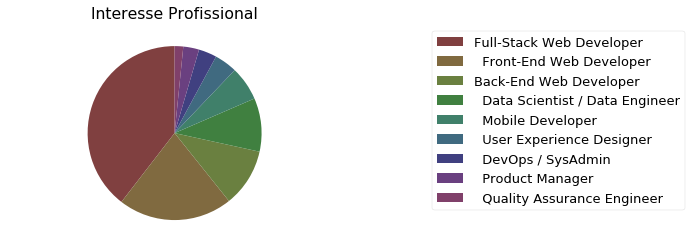

In [30]:
# Quais são os principais interesses dos participantes da pesquisa ?
# O principal interesse profisisonal dos programadores é o desenvolvimento web (full-stack, front-end e back-end), seguido pela área de data science

# Definindo a quantidade
num = len(df.JobRoleInterest.value_counts().index)

# Criando lista de cores
listaHSV = [(x * 1.0 / num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.JobRoleInterest.value_counts().index
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Grafico de Pizza
fatias, texto = plt.pie(df.JobRoleInterest.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title('Interesse Profissional')
plt.show()

## Distribuição de Empregabilidade

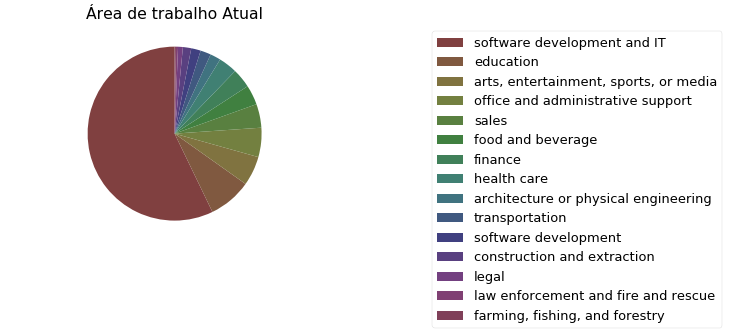

In [33]:
# Quais as áreas de negócios que os entrevistados da pesquisa trabalham?
# A maioria trabalha em empresaa de desenvolvimento de software, mas existe algumas pessoas em empresas de finanças e saude

# Definindo a quantidade
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x * 1.0 / num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.EmploymentField.value_counts().index

# Grafico de Pizza
fatias, texto = plt.pie(df.EmploymentField.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title('Área de trabalho Atual')
plt.show()

## Preferencia de Trabalho por Idade

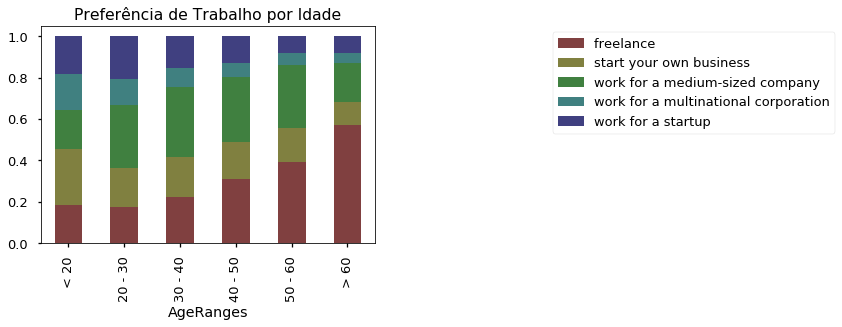

In [43]:
# Quais são as preferencias de trabalho por idade

# Agrupando os dados
df_ageranges = df.copy()
bins = [0, 20, 30, 40, 50, 60, 100]
df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'], bins, labels = ['< 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '> 60'])
df2 = pd.crosstab(df_ageranges.AgeRanges, df_ageranges.JobPref).apply(lambda x: x/x.sum(), axis = 1)

# definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x * 1.0 / num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Grafico de Barras (stacked)
ax1 = df2.plot(kind = 'bar', stacked = True, color = listaRGB, title = 'Preferência de Trabalho por Idade')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))
plt.show()

## Realocação por Idade

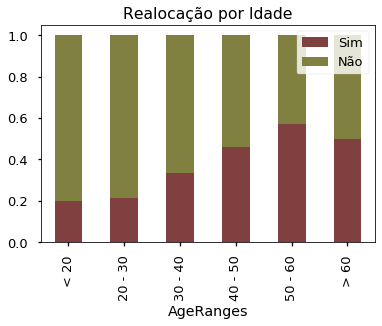

In [47]:
# Qual é o objetivo de realocação
# A vontade de buscar um novo emprego diminui com a idade
# Quase 80% das pessoas abaixo dos 30 anos estão preparadas para isso

# Agrupando os dados
df3 = pd.crosstab(df_ageranges.AgeRanges, df_ageranges.JobRelocateYesNo).apply(lambda x: x / x.sum(), axis = 1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x * 1.0 / num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Grafico de Barras (stacked)
ax1 = df3.plot(kind = 'bar', stacked = True, color = listaRGB, title = 'Realocação por Idade')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, ['Sim', 'Não'], loc = 'best')
plt.show()

## Idade x Horas de Aprendizagem

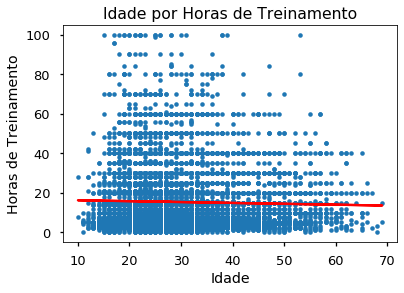

In [51]:
# Qual a relação entre idade e horas de aprendizagem?
# A idade dos profissionais não afeta a quantidade de tempo gasto com capacitação e treinamento

# criando subset de dados
df9 = df.copy()
df9 = df9.dropna(subset = ['HoursLearning'])
df9 = df9[df['Age'].isin(range(0, 70))]

# Definindo os valores de X e Y
x = df9.Age
y = df9.HoursLearning

# Computando os valores e gerando o grafico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m * x + b, '-', color = 'red')
plt.xlabel('Idade')
plt.ylabel('Horas de Treinamento')
plt.title('Idade por Horas de Treinamento')
plt.show()

## Investimento com Capacitação x Expectativa Salarial

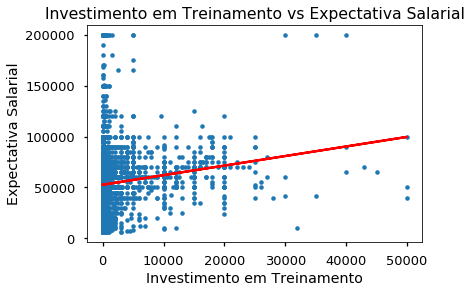

In [54]:
# Qual a relação entre investimento com capacitação e expectativa salarial

# Criando subsets dos dados
df5 = df.copy()
df5 = df5.dropna(subset = ['ExpectedEarning'])
df5 = df5[df['MoneyForLearning'].isin(range(0, 60000))]

# Definindo os valores de X e Y
x = df5.MoneyForLearning
y = df5.ExpectedEarning

# Computando os valores e gerando o grafico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m * x + b, '-', color = 'red')
plt.xlabel('Investimento em Treinamento')
plt.ylabel('Expectativa Salarial')
plt.title('Investimento em Treinamento vs Expectativa Salarial')
plt.show()